# BIG MART SALES PREDICTION

# PROBLEM ?

    #The aim is to build a predictive model and find out the sales of each product at a particular store.
    #With the outcome as the predicted sales, the BIG MART will try and understand the features of the product and stores       #that are playing a key role in the increase/decrease in the sales. 

# BREAKING THE PROBLEM INTO PARTS

 # 1) HYPOTHESIS GENERATION
 # 2)DATA EXPLORATION
 # 3) TESTING ASSUMPTIONS
 # 4) PRE-PROCESSING THE DATA
 # 5)BUILDING DIFFERENT REGRESSION MODELS TO PREDICT THE SALES

# 1. Hypothesis Generation:
    # In real world scenarios, hypothesis generation should be done in collaboration with the respective stakeholders.
    # Understand the problem at hand.
    # Before even getting our hands dirty with data, we create a list of features or factors that can possibly affect the         outcome(response/target variable- Sales of a Mart)
    # NOTE : *THIS BUSINESS IS AN OFFLINE MODEL 
    
    # LIST OF FACTORS:
    # PRODUCT LEVEL HYPOTHESIS:
        # INCREASE/DECREASE OF SALES :--> 1)BRAND SELLS
                                          2)GREAT PACKAGING
                                          3)DISCOUNT OFFERS
                                          4)MARKETING 
                                          5)CATEGORY OF THE PRODUCT( DAILY NEEDS, BOUGHT ONCE IN A MONTH etc)
                                          6)EASY OF ACCESSIBILITY IN THE STORE
    # STORE LEVEL HYPOTHESIS:
        # INCREASE/DECREASE OF SALES :--> 1)POPULATION IN THE AREA
                                          2)COMPETETION
                                          3)TIER CLASSIFICATION
                                          4)MARKETING 
                                          5)STORAGE CAPACITY
                                          6)CUSTOMER FRIENDLINESS 
                                          7)IMPORT COST
                                          8)STAFF SALARIES
                                          9)AGE OF THE STORE
    #NOT ALL THE FEATURES WILL BE AVALAIBLE IN THE DATASET THAT WE ARE GOING TO EXPLORE IN THE FURTHER STEPS
    # WE CAN TRY TO FEATURE ENGINEER THE POSSIBLE NEW VARIABLES OR COLLECT THEM FROM EXTERNAL SOURCES(which will highly           depend on invidual problem basis )


# WE WILL IMPORT THE REQUIRED LIBRARIES AS AND WHEN REQUIRED

# 2. DATA EXPLORATION
    # Identify what you have in the data with respect to the list in the hypothesis
    # draw inferences from the data such as number of usable features, categorical/numerical data-type,Missing                   values,correlation , univariate, bivariate,Outlier identification

In [1]:
# READ THE DATA FROM THE SOURCE FILE(WE CURRENTLY HAVE IT IN CSV FORMAT)
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.formula.api as sm
train=pd.read_csv("D:/DATA_SCIENCE/Gold_Mine/Regression/Big Mart Sales/TRAIN.csv")
test=pd.read_csv("D:/DATA_SCIENCE/Gold_Mine/Regression/Big Mart Sales/TEST.csv")

In [2]:
#COMBINING THE DATABASE TO AVOID RUNNING THE SAME STEPS OF PRE-PROCESSING 
# MARK THE TEST AND TRAIN RESPECTIVELY USING A NEW COLUMN
train['BELONGS_TO']='train'
test['BELONGS_TO']='test'

data= pd.concat([train,test],ignore_index=True,sort=False)

In [3]:
# LET's see if it looks fine?

data[0:5] # equivalent to data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,BELONGS_TO
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [4]:
data[-5:] # equivalent to data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,BELONGS_TO
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test


In [5]:
# LET'S SEE WHAT DATA TYPE EACH VARIABLE BELONGS TO ?
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
BELONGS_TO                    object
dtype: object

In [6]:
# The shape of the data
data.shape

(14204, 13)

In [7]:
# Now we see some statistical properties related to the available numerical features in the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,11765.0,12.792854,4.652502,4.555,8.710000,12.600000,16.750000,21.350000
Item_Visibility,14204.0,0.065953,0.051459,0.000,0.027036,0.054021,0.094037,0.328391
Item_MRP,14204.0,141.004977,62.086938,31.290,94.012000,142.247000,185.855600,266.888400
Outlet_Establishment_Year,14204.0,1997.830681,8.371664,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [8]:
# # BASIC INFERENCES AROUND THE SUMMARY ABOVE:
    # 1)Outlets(stores) were established from 1985 to 2009
    # 2)Visibility has a minimum of "zero" which cannot be possible.(A)
    # 3)weight and outlet sales have lesser count as compared to the shape of the dataset( we will explore the exploaration in the missing count)


## CHECKING THE FILL RATE

In [9]:

# MISSING VALUES - one of the challenge that we need to tackle in the pre processing step
# data.isnull().sum()

x=(data.isnull().sum() * 100 / len(data)).round(2).sort_values(ascending=False)
y=data.isnull().sum().sort_values(ascending=False)
pd.concat([x,y],axis=1,keys=['PRECENT','COUNT'])

,PRECENT,COUNT
Item_Outlet_Sales,40.00,5681
Outlet_Size,28.27,4016
Item_Weight,17.17,2439
BELONGS_TO,0.00,0
Outlet_Type,0.00,0
Outlet_Location_Type,0.00,0
Outlet_Establishment_Year,0.00,0
Outlet_Identifier,0.00,0
Item_MRP,0.00,0
Item_Type,0.00,0


In [10]:
# # BASIC INFERENCES AROUND THE SUMMARY ABOVE:
    # 1) Item weight and Outlet size are genuinely have missing values
    # 2) The target variable(Item_Outlet_Sales) has missing for the unlabelled source- test data set

## DATA EXPLORATION FOR POSSIBLE AND IMMEDIATE FEATURE ENGINEERING

In [11]:
# we will check the unique count that every  variable holds 
data.apply(lambda u: len(u.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
BELONGS_TO                       2
dtype: int64

In [12]:
# # BASIC INFERENCES AROUND THE SUMMARY ABOVE:
    # 1) we have 1559 items that are being sold
    # 2) we have 10 stores currently
    # 3) 4 different types of categories of stores
    # 4) available in three different type of locations
    # 5) we have 16 different category of items

# EXPLORING THE CATEGORICAL VARIABLES FIRST

## LET'S EXPLORE THE FREQUENCY WITHIN EACH CATEGORICAL FEATURE 

In [13]:
#Filter categorical variables
cat_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']
#Exclude ID columns and BELONGS_TO:
cat_columns = [x for x in cat_columns if x not in ['Item_Identifier','Outlet_Identifier','BELONGS_TO']]
#Print frequency of categories
for col in cat_columns:
    print('\nFrequency of Categories for varible %s'%col)
    print(data[col].value_counts())


Frequency of Categories for varible Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for varible Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for varible Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

Frequency of Categories for varible Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

F

In [14]:
# # TAKING INTO CONSIDERATION EACH FEATURE ABOVE ONE AT A TIME:
#     1) ITEM_FAT_CONTENT: from the summary above we majorly have two categories which are misspelled,
#         post correcting them we should have two categories of the feature(B)
#     2) ITEM_TYPE : we should probably combine some of these as all of them do not have a subtantial weight in the distribution
#     3) Outlet size : looks just fine to me
#     4) OUtlet Location type : looks fine
#     5) Outlet type : Super market 2,3 and grocery store can be combined

# PLOTTING CHARTS FOR A BETTER VISUAL UNDERSTANDING OF THE FEATURES 

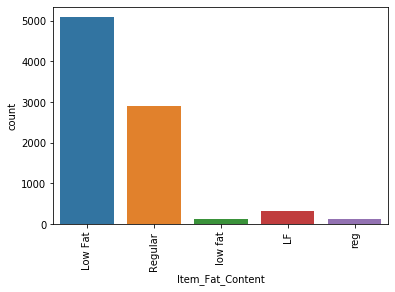

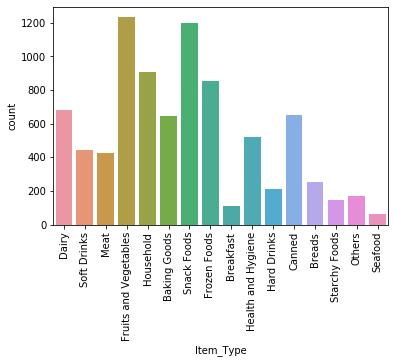

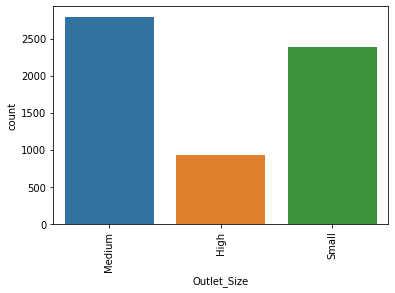

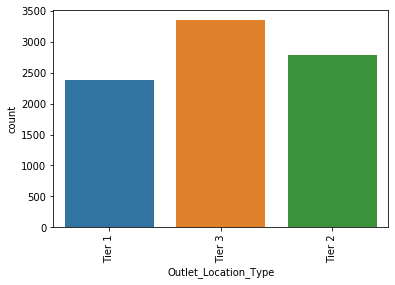

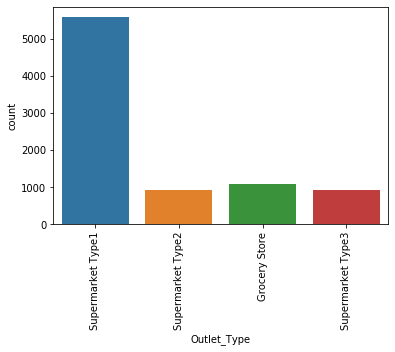

In [15]:
l=cat_columns
for i in l:
    sns.countplot(train[i])
    plt.xticks(rotation=90)
    plt.show()

In [16]:
# BASIC INFERENCES
#=======================
# OUTLET SIZE
# we have few outlets with huge size
#================================
# TIER/ LOCATION TYPE

# other than the usual assumption that will be : more supermarts will be in the tier 1(densily populated area) is not that 
# evident from the graph below, the small to medium cities have more presence of the brands
#====================================
# THE TYPE OF THE OUTLET --- Supermarts and Groceries

# Can 2,3 and groceries be still combined??? we should go ahead and do a bivariate analysis and see if that could give us some additional
#details?

# PEEKING FURTHER 

In [17]:
# WHAT IMPACT CAN DIFFERENT CATEGORICAL VARIABLES CAN HAVE ON THE RESPONSE VARIABLE????

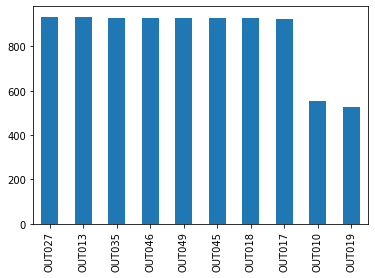

In [18]:
# OUTLET IDENTIFIER AND THE OUTLET SALES( we are taking the count of sales in the plot)
train.Outlet_Identifier.value_counts().plot(kind='bar')

In [19]:
# FROM ABOVE IT IS PRETTY EVIDENT THAT THE OUTLET 019 and 010 have the lowest number of sales

# LET's SEE HOW THE OUTLET TYPE PLAYS A ROLE HERE??? OR NOT ?

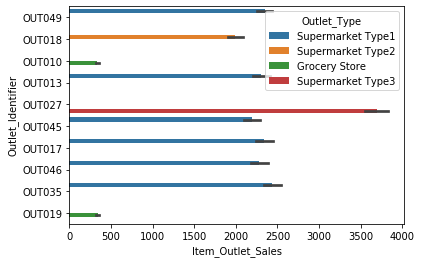

In [20]:
sns.barplot(train['Item_Outlet_Sales'],train['Outlet_Identifier'],hue=train['Outlet_Type'])

In [21]:
# THUS THE OUTLET 019 and 010 are from the category "grocery", we are assuming them to be small compared to others

In [22]:
# NOW WHAT KIND OF STORE SIZE DO THE CUSTOMERS PREFER USUALLY??
# WE WILL LOOK AT THE OUTLET SIZE WITH RESPECT TO THE OUTLET SALES

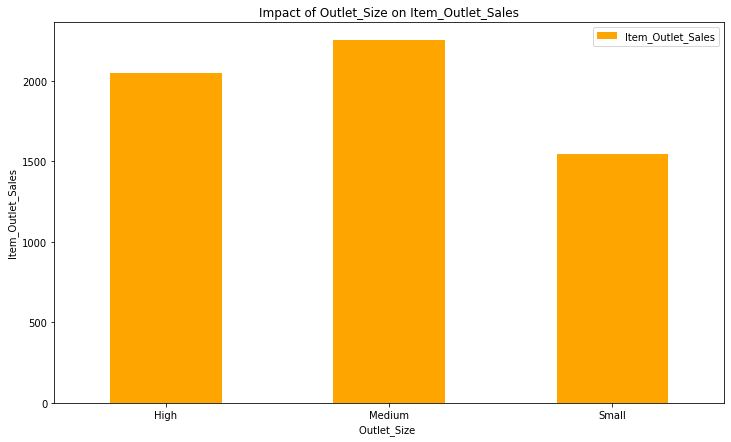

In [23]:
Outlet_Size_pivot = train.pivot_table(index='Outlet_Size', values='Item_Outlet_Sales', aggfunc=np.median)
Outlet_Size_pivot.plot(kind='bar', color='orange',figsize=(12,7))
plt.xlabel('Outlet_Size ')
plt.ylabel('Item_Outlet_Sales')
plt.title('Impact of Outlet_Size on Item_Outlet_Sales')
plt.xticks(rotation=0)
plt.show()

In [24]:
# THE GRAPH ABOVE SHOW THAT THE CUSTOMER ARE MORE INCLINED TOWARDS BUYING AN ITEM FROM THE MEDIUM SIZE STORES? 
# Isn't that interesting ?
# won't the tier1(highpopulation density) have all of the stores with high in size??
# Let's look at what type of stores are available in the different tiers?

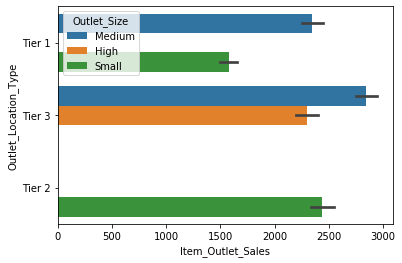

In [25]:
sns.barplot(train['Item_Outlet_Sales'],train['Outlet_Location_Type'],hue=train['Outlet_Size'])

In [26]:
# FROM THE GRAPH ABOVE WE CAN SEE THAT : The medium size are giving us highest sales are indeed present in Tier 1 and Tier3 both
# Hence our assumption of population density supporting the Outlet sales is being dependent on the type of store which is presen that city 

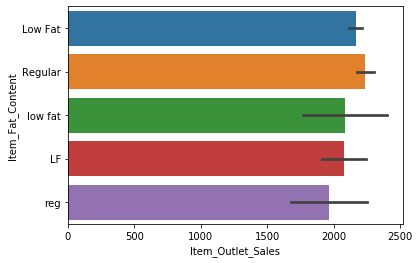

In [27]:
# EXPLORING FAT CONTENT
sns.barplot(train['Item_Outlet_Sales'],train['Item_Fat_Content'])


In [28]:
# Daily use products should have a higher tendency to sell as compared to the specific use products.
# “Low Fat” products seem to have higher sales values than “Regular” products.
# we need to combine the sub categories at broader level in the pre processing steps

# DISTRIBUTION OF CONTINUOS VARIABLES

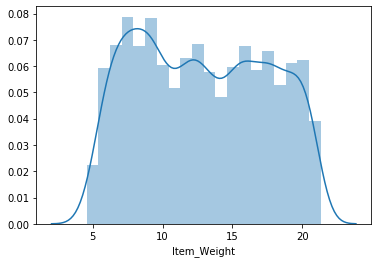

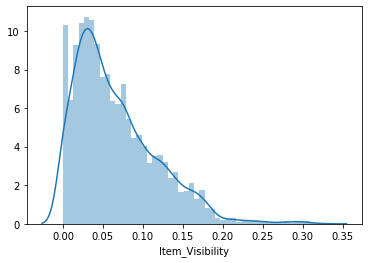

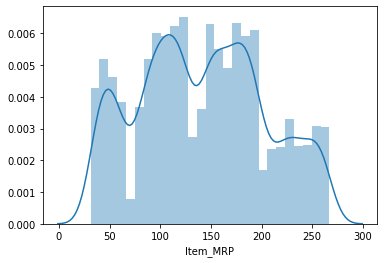

In [29]:
num = [x for x in train.dtypes.index if train.dtypes[x]=='float']
#Exclude ID columns and BELONGS_TO:
NUM = [x for x in num if x not in ['Item_Identifier','Outlet_Identifier','BELONGS_TO','Item_Outlet_Sales']]

for i in NUM:
    sns.distplot(train[i],  kde=True)
    plt.show()

# 3. PRE-PROCESSING- 
## WE WILL CONSIDER THE WHOLE COMBINED BASE AS MENTIONED EARLIER TO AVOID RE RUNNING THE NECESSARY STEPS OF PRE-PROCESSING

## IMPUTING MISSING VALUES

In [30]:
# we will start with imputing the missing values wherever necessary
# as identified earlier weight of the item and size of the outlet(store)

#WEIGHT 
#Determine the average weight per item:
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')

#Get a boolean variable specifying missing Item_Weight values
miss_bool = data['Item_Weight'].isnull() 

# #Impute data

data.loc[miss_bool,'Item_Weight'] = data.loc[miss_bool,'Item_Identifier'].apply(lambda x: item_avg_weight.loc[x])





In [31]:
#OUTLET SIZE

from scipy.stats import mode

data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace=True)



# CHECK THE FILL RATE AGAIN

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

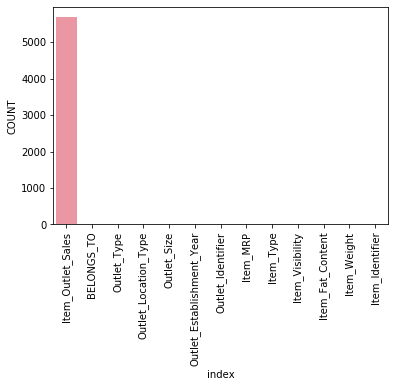

In [32]:
x=(data.isnull().sum() * 100 / len(data)).round(2).sort_values(ascending=False)
y=data.isnull().sum().sort_values(ascending=False)

FR=pd.concat([x,y],axis=1,keys=['PRECENT','COUNT']).reset_index()
sns.barplot(FR['index'],FR['COUNT'])
plt.xticks(rotation=90)

In [33]:
# Okay, so we do not have any missing values to impute now.
#Let's get further with this

# FEATURE ENGINEERING

In [34]:
# as mentioned above that visibility cannot be Zero.
# let's impute it with an average value as per the Item Identifier
#WEIGHT 
#Determine the average weight per item:
item_avg_visibility = data.pivot_table(values='Item_Visibility', index='Item_Identifier')

# #Get a boolean variable specifying missing Item_Weight values
zero_visibility = data['Item_Visibility']==0


# # #Impute data

data.loc[zero_visibility,'Item_Visibility'] = data.loc[zero_visibility,'Item_Identifier'].apply(lambda x: item_avg_visibility.loc[x])
# train['Item_Visibility'] = train['Item_Visibility'].replace(0,np.mean(train['Item_Visibility']))

In [35]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,14204.0,12.793380,4.651716,4.555000,8.710000,12.600000,16.75000,21.350000
Item_Visibility,14204.0,0.069710,0.049728,0.003575,0.031145,0.057194,0.09693,0.328391
Item_MRP,14204.0,141.004977,62.086938,31.290000,94.012000,142.247000,185.85560,266.888400
Outlet_Establishment_Year,14204.0,1997.830681,8.371664,1985.000000,1987.000000,1999.000000,2004.00000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290000,834.247400,1794.331000,3101.29640,13086.964800


In [36]:
# we will tackle the Fat Content Variable
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
data['Outlet_Location_Type'] = data['Outlet_Location_Type'].replace({'Tier 1':'T1','Tier 2':'T2','Tier 3':'T3'})
data['Outlet_Type'] = data['Outlet_Type'].replace({'Supermarket Type1':'ST1','Supermarket Type2':'ST2','Supermarket Type3':'ST3','Grocery Store':'GS'})

In [37]:
data.Outlet_Type.unique()

array(['ST1', 'ST2', 'GS', 'ST3'], dtype=object)

In [38]:
# Taking care of the multiple item type, we will create a broader level of category for them.
# If you look closely at the item identifier's first two characters , which are repetetive and common in multiple case
# we will map them as following:
# 1)FD- Food
# 2)NC- Non-Consumable
# 3)DR- Drinks
#Get the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food','NC':'Non_Consumable','DR':'Drinks'})


## BUT WAIT , DO WE HAVE SOME CATEGORY OF FAT CONTENT FOR THE NON CONSUMABLES??

In [39]:
pd.crosstab(data['Item_Type_Combined'],data['Item_Fat_Content'])

Item_Fat_Content,Low Fat,Regular
Item_Type_Combined,,
Drinks,1208,109
Food,5291,4910
Non_Consumable,2686,0


In [40]:
# We need to give this a category 
data['Item_Fat_Content']=np.where(data['Item_Type_Combined']=='Non_Consumable',data['Item_Fat_Content'].replace({'Low Fat':'NON_EDIBLE'}),data['Item_Fat_Content'])

In [41]:
pd.crosstab(data['Item_Type_Combined'],data['Item_Fat_Content'])

Item_Fat_Content,Low Fat,NON_EDIBLE,Regular
Item_Type_Combined,,,
Drinks,1208,0,109
Food,5291,0,4910
Non_Consumable,0,2686,0


In [42]:
# STORE AGE
#NOw let's create a variable using the Item_Establishment_year as the age of the outlet will have more context in the current problem statement
#Remember the data is as of  2013 as stated in the problem statement in the beginning
data['Store_Age_Years'] = 2013 - data['Outlet_Establishment_Year']

In [43]:
# Do we really have to combine the Outlet_Type?
data.pivot_table(values='Item_Outlet_Sales', columns='Outlet_Type')


Outlet_Type,GS,ST1,ST2,ST3
Item_Outlet_Sales,339.8285,2316.181148,1995.498739,3694.038558


In [44]:
#As observed by the results above, the average product sales are significantly different so we do not necessarily have to combined 
#them to get some significance out of it

In [45]:
# we can clearly drop 
# 1)Outlet_Establishment_Year(as we have engineered it already into Store_Age_Years)

data.drop(['Outlet_Establishment_Year','Item_Type'],axis=1,inplace=True)




In [46]:
data.dtypes

Item_Identifier          object
Item_Weight             float64
Item_Fat_Content         object
Item_Visibility         float64
Item_MRP                float64
Outlet_Identifier        object
Outlet_Size              object
Outlet_Location_Type     object
Outlet_Type              object
Item_Outlet_Sales       float64
BELONGS_TO               object
Item_Type_Combined       object
Store_Age_Years           int64
dtype: object

In [47]:
# Secondly we can keep the Outlet Identifier while training the model, but of course in a numeric form as scikit-learn accepts numeric
# therefore we will keep a copy of Outlet_Identifier into Store_ID
data['Store_ID']=data['Outlet_Identifier']

In [48]:
#Seperating the sets to be used further wherever dummy variables won't give much info

TRAIN=data[data['BELONGS_TO']=='train']
TRAIN.drop('BELONGS_TO',axis=1,inplace=True)
TEST=data[data['BELONGS_TO']=='test']
TEST.drop(['BELONGS_TO','Item_Outlet_Sales'],axis=1,inplace=True)
TRAIN.shape,TEST.shape

C:\Users\shashank.upadhyay\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


((8523, 13), (5681, 12))

In [49]:
# BEFORE SPLITTING THE DATASET BACK INTO TRAIN AND TEST, WE NEED TO USE ONE HOT ENCODING SO THAT EVEN THE CATEGORICAL FEATURES CAN
# BE USED TO TRAIN 

# creating dummy variables to convert categorical into numeric values 
mylist = list(data.select_dtypes(include=['object']).columns) 
mylist = [x for x in mylist if x not in ['Item_Identifier','Outlet_Identifier','BELONGS_TO']]


def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[feature_to_encode],drop_first=True)
#     For example, the Item_Fat_Content has 3 categories — LowFat,Regular,Non-Edible. One hot coding will remove 
#     this variable and generate 3 new variables.
#     Each will have binary numbers — 0 (if the category is not present) and 1(if category is present).
 # we are dropping the the first category to reduce the covariance among the features, as the the same information is provided
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop(feature_to_encode, axis=1)
    return(res)
COMBINED=encode_and_bind(data,mylist)

In [50]:
# Next we need to break the dataset back into train and test and dropping unnecessarry columns from the respective base

train=COMBINED[COMBINED['BELONGS_TO']=='train']
train.drop('BELONGS_TO',axis=1,inplace=True)
test=COMBINED[COMBINED['BELONGS_TO']=='test']
test.drop(['BELONGS_TO','Item_Outlet_Sales'],axis=1,inplace=True)
train.shape,test.shape

((8523, 27), (5681, 26))

In [51]:
COMBINED.columns


Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Identifier', 'Item_Outlet_Sales', 'BELONGS_TO',
       'Store_Age_Years', 'Item_Fat_Content_NON_EDIBLE',
       'Item_Fat_Content_Regular', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_T2', 'Outlet_Location_Type_T3', 'Outlet_Type_ST1',
       'Outlet_Type_ST2', 'Outlet_Type_ST3', 'Item_Type_Combined_Food',
       'Item_Type_Combined_Non_Consumable', 'Store_ID_OUT013',
       'Store_ID_OUT017', 'Store_ID_OUT018', 'Store_ID_OUT019',
       'Store_ID_OUT027', 'Store_ID_OUT035', 'Store_ID_OUT045',
       'Store_ID_OUT046', 'Store_ID_OUT049'],
      dtype='object')

# LET'S ASSIGN WHAT IS OUR TARGET, ID AND PREDICTORS BEFORE FITTING ANY MODEL 

In [52]:
#Define target and ID columns and the initial predictors:
target = ['Item_Outlet_Sales']
IDcol = ['Item_Identifier','Outlet_Identifier']
v=['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Identifier', 'Item_Outlet_Sales', 'BELONGS_TO',
       'Store_Age_Years', 'Item_Fat_Content_NON_EDIBLE',
       'Item_Fat_Content_Regular', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_T2', 'Outlet_Location_Type_T3', 'Outlet_Type_ST1',
       'Outlet_Type_ST2', 'Outlet_Type_ST3', 'Item_Type_Combined_Food',
       'Item_Type_Combined_Non_Consumable', 'Store_ID_OUT013',
       'Store_ID_OUT017', 'Store_ID_OUT018', 'Store_ID_OUT019',
       'Store_ID_OUT027', 'Store_ID_OUT035', 'Store_ID_OUT045',
       'Store_ID_OUT046', 'Store_ID_OUT049']

predictors= [x for x in v if x not in ['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales','BELONGS_TO']]



In [53]:
predictors

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Store_Age_Years',
 'Item_Fat_Content_NON_EDIBLE',
 'Item_Fat_Content_Regular',
 'Outlet_Size_Medium',
 'Outlet_Size_Small',
 'Outlet_Location_Type_T2',
 'Outlet_Location_Type_T3',
 'Outlet_Type_ST1',
 'Outlet_Type_ST2',
 'Outlet_Type_ST3',
 'Item_Type_Combined_Food',
 'Item_Type_Combined_Non_Consumable',
 'Store_ID_OUT013',
 'Store_ID_OUT017',
 'Store_ID_OUT018',
 'Store_ID_OUT019',
 'Store_ID_OUT027',
 'Store_ID_OUT035',
 'Store_ID_OUT045',
 'Store_ID_OUT046',
 'Store_ID_OUT049']

# 4)TESTING THE ASSUMPTIONS OF REGRESSION


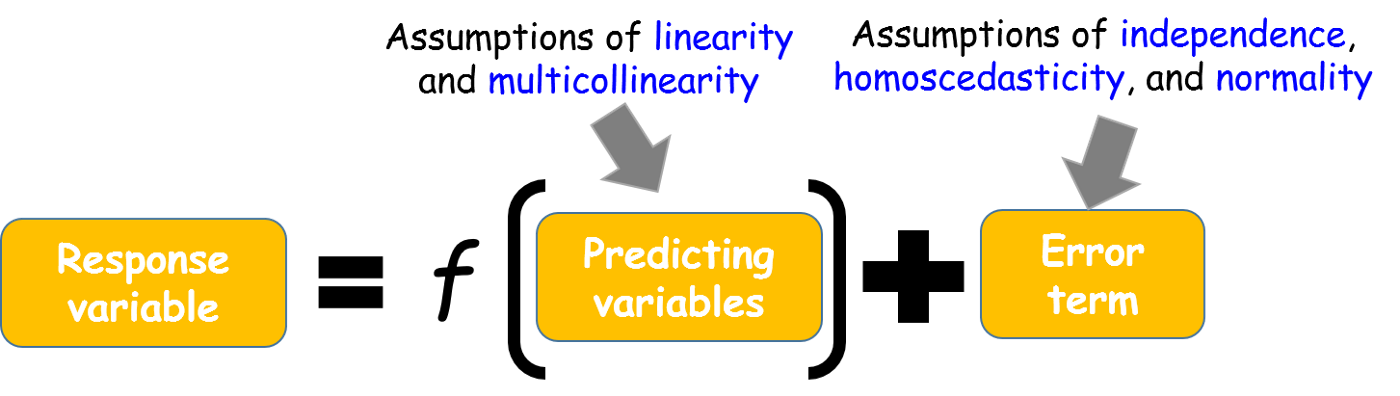
a) Linearity and Additivity

b) No heteroskedasticity( some unknown constant variance and mean should be zero)

c) Multicolliniearity ( in case of multiple IVs)

d) Autocorrelation (the residuals are independent)

e) Normality
(The errors are generated from a Normal distribution (of unknown mean and variance, which can be estimated from the data). Note, this is not a necessary condition to perform linear regression unlike the top three above. However, without this assumption being satisfied, you cannot calculate the so-called ‘confidence’ or ‘prediction’ intervals easily as the well-known analytical expressions corresponding to Gaussian distribution cannot be used)

===========================================================================================================================
The proxy( because we can never really know the true error),of true errors are the residuals, which are just the difference between the observed values and the fitted values.
Bottom line — we need to plot the residuals, check their random nature, variance, and distribution for evaluating the model quality. This is the visual analytics needed for goodness-of-fit estimation of a linear model.

Apart from this, multicollinearity can be checked from the 

correlation matrix and heatmap, 

and outliers in the data (residual) can be checked by so-called Cook’s distance plots.

# LINEARITY

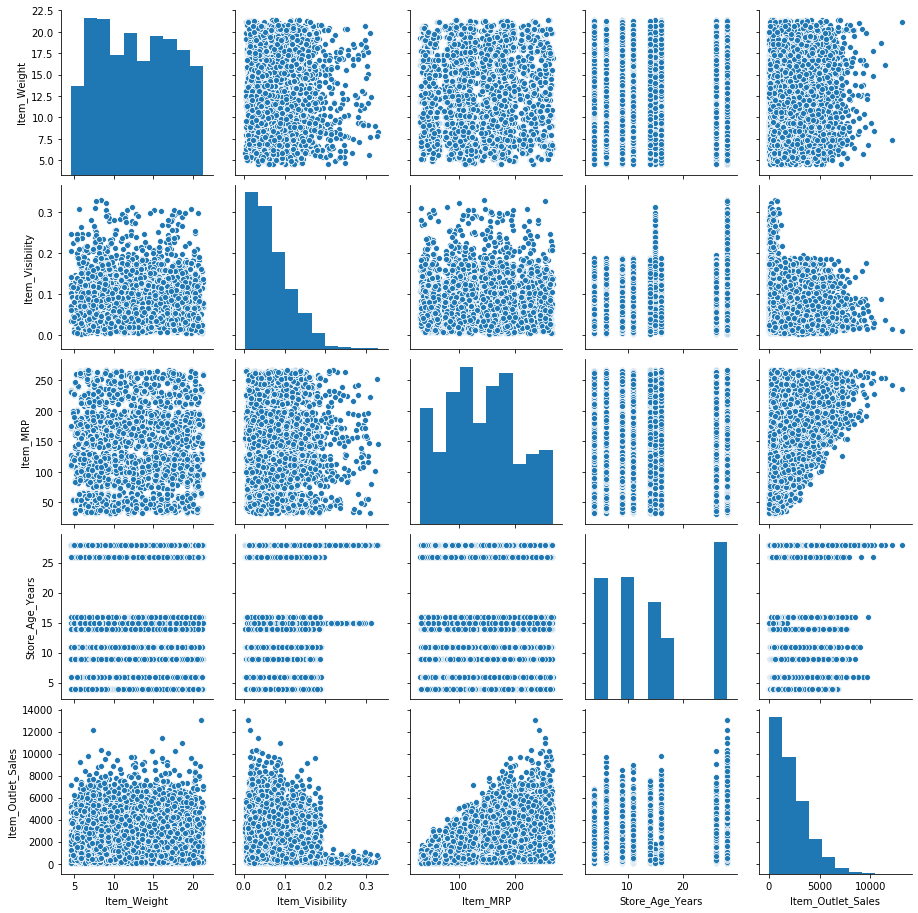

In [54]:
# Let's visually look at how continuous variables vary with each other 
PAIRS=train[['Item_Weight','Item_Visibility','Item_MRP','Store_Age_Years','Item_Outlet_Sales']]
# Looking at the pairplot of the all the variables won't be possible to the eye, hence looking at only the non-endoded variables
sns.pairplot(PAIRS)

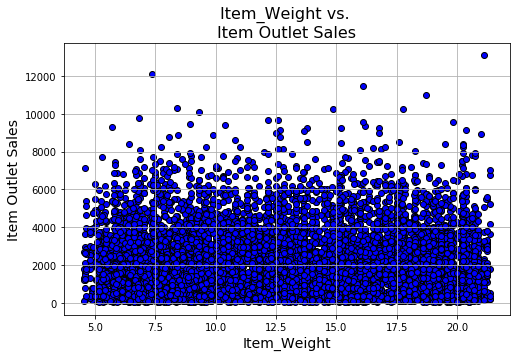

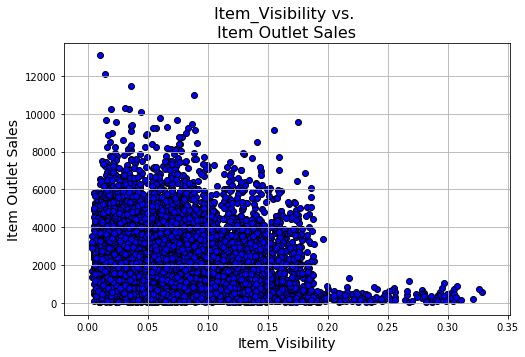

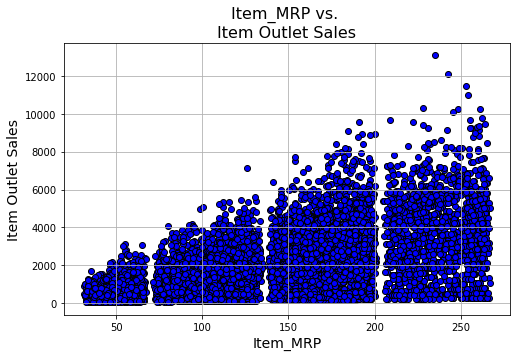

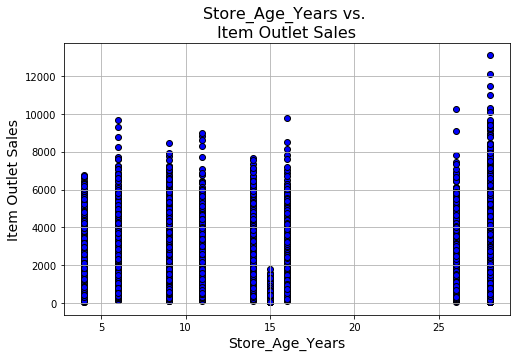

In [55]:
#Looking at the predictors Vs Response variable
num=[ 'Item_Weight', 'Item_Visibility', 'Item_MRP','Store_Age_Years']

%matplotlib inline
for c in train[num]:
    plt.figure(figsize=(8,5))
    plt.title("{} vs. \nItem Outlet Sales".format(c),fontsize=16)
    plt.scatter(x=train[c],y=train[target],color='blue',edgecolor='k')
    plt.grid(True)
    plt.xlabel(c,fontsize=14)
    plt.ylabel('Item Outlet Sales',fontsize=14)
    plt.show()


# Not looking for linearity in dummy as 
https://stats.stackexchange.com/questions/89624/linearity-assumption-in-ols-with-dummy-variables

# Correlation matrix and Heatmap to check the multicollinearity


1) All continiuos IVs -> Pearson's correlation


2) Dichotomous categorical variable and a continuous variable you can calculate a Pearson correlation if the categorical 
   variable has a 0/1-coding for the categories. This correlation is then also known as a point-biserial correlation cofficient
   
3) Multilevel categorical variable and continuous variables together?


    # Dython
    # A set of Data analysis tools in pYTHON 3.x.

    # Key features:

    # Measures of association for categorical features
    # Plot features correlation and association for mixed data-sets (categorical and continuous features) in an easy and simple way
    # Plot ROC curves with AUC scores and estimated-optimal thresholds
  

In [56]:
TRAIN.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Type_Combined',
       'Store_Age_Years', 'Store_ID'],
      dtype='object')

C:\Users\shashank.upadhyay\Anaconda3\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


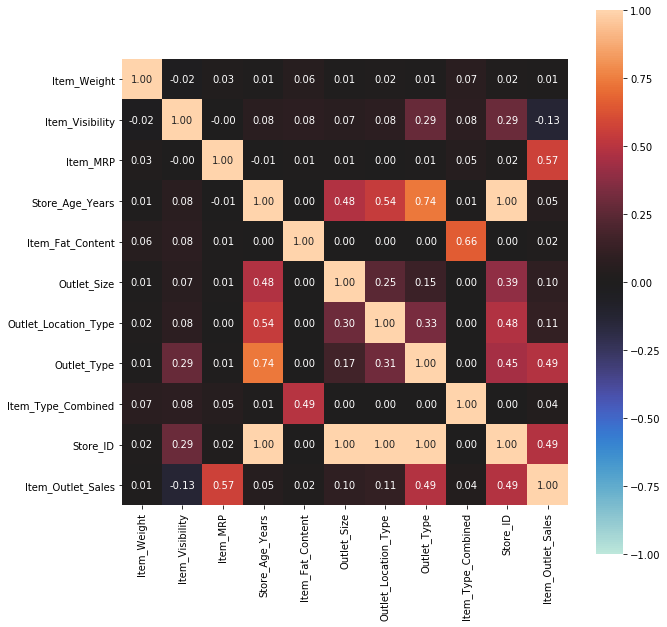

{'corr':                       Item_Weight  Item_Visibility  Item_MRP  Store_Age_Years  \
 Item_Weight              1.000000        -0.019166  0.026172         0.012823   
 Item_Visibility         -0.019166         1.000000 -0.004346         0.075664   
 Item_MRP                 0.026172        -0.004346  1.000000        -0.005020   
 Store_Age_Years          0.012823         0.075664 -0.005020         1.000000   
 Item_Fat_Content         0.056951         0.080327  0.009642         0.004706   
 Outlet_Size              0.010504         0.070181  0.010859         0.480639   
 Outlet_Location_Type     0.015809         0.083459  0.001997         0.542088   
 Outlet_Type              0.008292         0.287950  0.008807         0.735755   
 Item_Type_Combined       0.071893         0.079360  0.051831         0.009895   
 Store_ID                 0.020827         0.289130  0.018028         1.000000   
 Item_Outlet_Sales        0.013261        -0.128453  0.567574         0.049135   
 
      

In [57]:
from dython.nominal import associations

cat = [x for x in TRAIN.dtypes.index if TRAIN.dtypes[x]=='object']
cat = [x for x in cat if x not in ['Item_Identifier','Outlet_Identifier']]
associations(TRAIN[num+cat+target], theil_u=True, figsize=(10, 10))

## There are visual signs of multicollinearity, which needs to be identified specifically. 

# dropping Store_ID, Store_Age_Years looks like a feasible option to avoid pushing same info to the model


In [58]:
predictors

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Store_Age_Years',
 'Item_Fat_Content_NON_EDIBLE',
 'Item_Fat_Content_Regular',
 'Outlet_Size_Medium',
 'Outlet_Size_Small',
 'Outlet_Location_Type_T2',
 'Outlet_Location_Type_T3',
 'Outlet_Type_ST1',
 'Outlet_Type_ST2',
 'Outlet_Type_ST3',
 'Item_Type_Combined_Food',
 'Item_Type_Combined_Non_Consumable',
 'Store_ID_OUT013',
 'Store_ID_OUT017',
 'Store_ID_OUT018',
 'Store_ID_OUT019',
 'Store_ID_OUT027',
 'Store_ID_OUT035',
 'Store_ID_OUT045',
 'Store_ID_OUT046',
 'Store_ID_OUT049']

In [59]:
# let fit an OLS model to review certain characteristics our model
response_predictors = 'Item_Outlet_Sales'+' ~ '+'+'.join(predictors)
model=sm.ols(formula=response_predictors , data=train)
fitted = model.fit()
print(fitted.summary())


                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     732.1
Date:                Wed, 24 Jun 2020   Prob (F-statistic):               0.00
Time:                        15:55:36   Log-Likelihood:                -71991.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8507   BIC:                         1.441e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

# REFERENCE
https://www.youtube.com/watch?v=U7D1h5bbpcs

https://www.datarobot.com/blog/ordinary-least-squares-in-python/

In [60]:
df_result=pd.DataFrame()
df_result['pvalues']=fitted.pvalues[1:]
df_result['Features']=predictors
df_result.set_index('Features',inplace=True)

def yes_no(b):
    if b <0.01:
        return 'Yes'
    else:
        return 'No'
df_result['Statistically_significant?']= df_result['pvalues'].apply(yes_no)
df_result

,pvalues,Statistically_significant?
Features,,
Item_Weight,9.950443e-01,No
Item_Visibility,4.052052e-01,No
Item_MRP,0.000000e+00,Yes
Store_Age_Years,5.373488e-05,Yes
Item_Fat_Content_NON_EDIBLE,8.094861e-01,No
Item_Fat_Content_Regular,1.407302e-01,No
Outlet_Size_Medium,1.904140e-96,Yes
Outlet_Size_Small,9.031707e-106,Yes
Outlet_Location_Type_T2,1.828760e-20,Yes


In [61]:
new=df_result[df_result['Statistically_significant?']=='Yes']


In [62]:
pre=list(new.index.values)


response_predictors = 'Item_Outlet_Sales'+' ~ '+'+'.join(pre)
model=sm.ols(formula=response_predictors , data=train)
fitted = model.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     1098.
Date:                Wed, 24 Jun 2020   Prob (F-statistic):               0.00
Time:                        15:55:37   Log-Likelihood:                -71993.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8512   BIC:                         1.441e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                -

# Variance influence factors

The OLS model summary for this dataset shows a warning for multicollinearity. But how to check which factors are causing it?
We can compute the variance influence factors for each predicting variable. It is the ratio of variance in a model with multiple terms, divided by the variance of a model with one term alone. 


https://www.sigmamagic.com/blogs/what-is-variance-inflation-factor/


The  VIF gives how  much the variance of the coefficient estimate is being inflated by collinearity. If the VIF for a variable is 16 the associated  standard error is four  times as large as it would be if its VIF was 1. In such a case, the coefficient would have to be 4 times as large to be statistically significant at a given significance the level.
The VIF can be conceived as related to the  R-squared of a particular predictor variable regressed on all other includes predictor variables.:
VIF of X1 = 1/(1 - R-squared of X1 on all other Xs).
If you only have 1 X or that X is orthogonal with all the other Xs; then
VIF = 1/(1-0) = 1 - so no variance inflation
 If two Xs are perfectly correlated
VIF = 1/(1-1)= 1/0 = infinity that is the estimate is as imprecise as it can be.
The VIF is efficiently calculated (not by running a series of regressions) but as the diagonal element of  the inverse of the correlation matrix of the predictors.

In [63]:
df1=train[pre]
df2=train[target]

In [64]:
df=pd.merge(df1, df2, left_index=True, right_index=True)

In [65]:

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
i=1
for i in range(len(df.columns[:-1])):
    v=vif(np.matrix(df[:-1]),i)
    print("Variance inflation factor for {}: {}".format(df.columns[i],round(v,2)))
    

Variance inflation factor for Item_MRP: 1.74
Variance inflation factor for Store_Age_Years: inf
Variance inflation factor for Outlet_Size_Medium: inf
Variance inflation factor for Outlet_Size_Small: inf
Variance inflation factor for Outlet_Location_Type_T2: inf
Variance inflation factor for Outlet_Location_Type_T3: inf
Variance inflation factor for Outlet_Type_ST1: inf
Variance inflation factor for Outlet_Type_ST2: inf
Variance inflation factor for Outlet_Type_ST3: inf
Variance inflation factor for Store_ID_OUT013: inf
Variance inflation factor for Store_ID_OUT017: inf
Variance inflation factor for Store_ID_OUT018: inf
Variance inflation factor for Store_ID_OUT019: inf
Variance inflation factor for Store_ID_OUT027: inf

C:\Users\shashank.upadhyay\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)



Variance inflation factor for Store_ID_OUT046: inf
Variance inflation factor for Store_ID_OUT049: inf


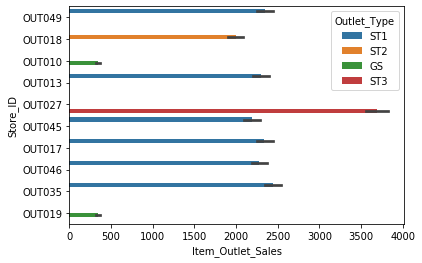

In [66]:
sns.barplot(TRAIN['Item_Outlet_Sales'],TRAIN['Store_ID'],hue=TRAIN['Outlet_Type'])

In [67]:
#Looks like we can try and omit all outlet identifiers  as they were highly correlated with multiple variables

In [68]:
# Let's drop outlet types


df= df.drop(['Store_ID_OUT013','Store_ID_OUT019','Store_ID_OUT018','Store_ID_OUT017','Store_ID_OUT046','Store_ID_OUT049','Store_ID_OUT027'],axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
i=1
for i in range(len(df.columns[:-1])):
    v=vif(np.matrix(df[:-1]),i)
    print("Variance inflation factor for {}: {}".format(df.columns[i],round(v,2)))

Variance inflation factor for Item_MRP: 10.64
Variance inflation factor for Store_Age_Years: 13.27
Variance inflation factor for Outlet_Size_Medium: 6.26
Variance inflation factor for Outlet_Size_Small: 4.44
Variance inflation factor for Outlet_Location_Type_T2: 3.31
Variance inflation factor for Outlet_Location_Type_T3: 6.86
Variance inflation factor for Outlet_Type_ST1: 6.78
Variance inflation factor for Outlet_Type_ST2: 4.04
Variance inflation factor for Outlet_Type_ST3: 3.94


In [70]:
# Let's drop Store Age_Years as it was muticollinear as per the correlation matrix


df= df.drop('Store_Age_Years',axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
i=1
for i in range(len(df.columns[:-1])):
    v=vif(np.matrix(df[:-1]),i)
    print("Variance inflation factor for {}: {}".format(df.columns[i],round(v,2)))
    

Variance inflation factor for Item_MRP: 9.97
Variance inflation factor for Outlet_Size_Medium: 5.6
Variance inflation factor for Outlet_Size_Small: 2.93
Variance inflation factor for Outlet_Location_Type_T2: 2.55
Variance inflation factor for Outlet_Location_Type_T3: 3.83
Variance inflation factor for Outlet_Type_ST1: 5.4
Variance inflation factor for Outlet_Type_ST2: 2.75
Variance inflation factor for Outlet_Type_ST3: 3.56


In [89]:
final=['Item_MRP',
 'Outlet_Size_Small',
  'Outlet_Size_Medium',
 'Outlet_Location_Type_T2',
 'Outlet_Location_Type_T3',
 'Outlet_Type_ST1',
 'Outlet_Type_ST2','Outlet_Type_ST3']

# Autocorrelation- Residuals vs. predictors plots
Next, we can plot the residuals versus each of the predicting variables to look for independence or autocorrelation within the residual assumption.

If the residuals are distributed uniformly randomly around the zero x-axes and do not form specific clusters, then the assumption holds true.

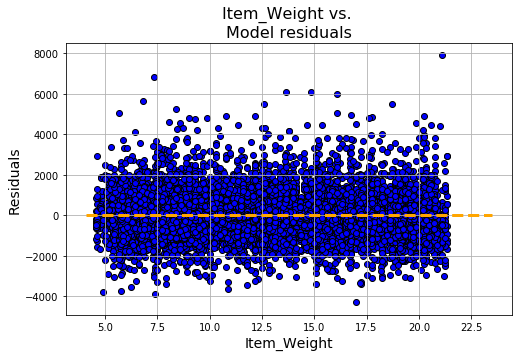

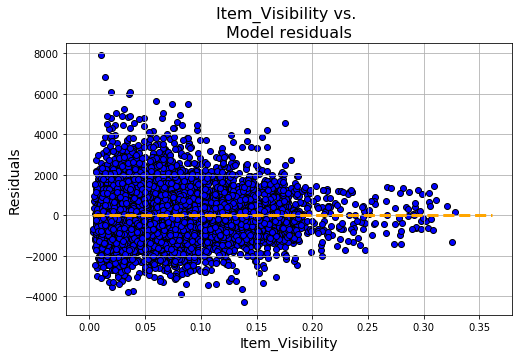

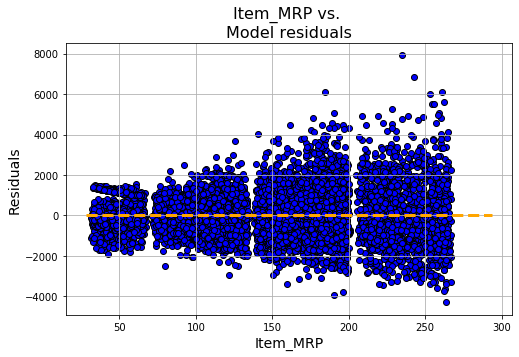

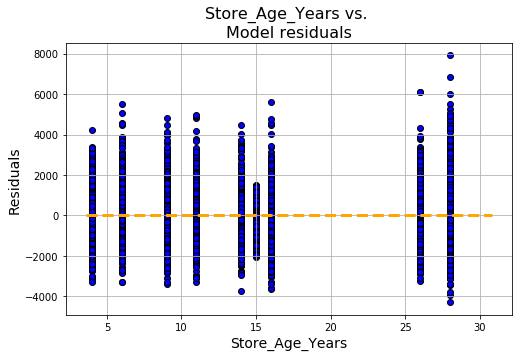

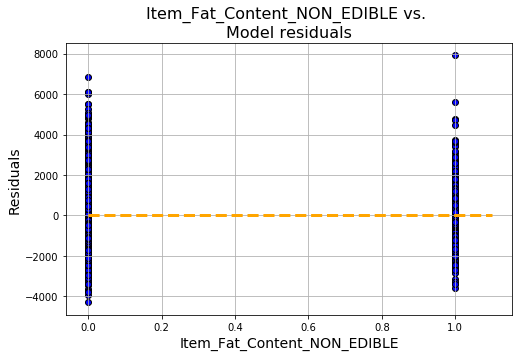

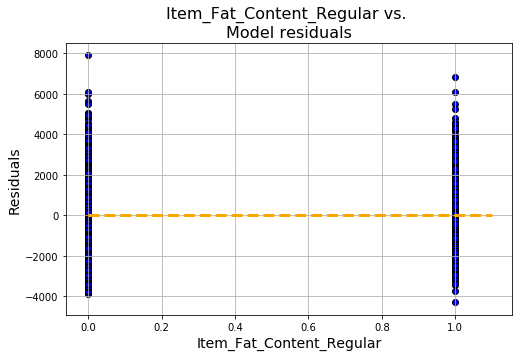

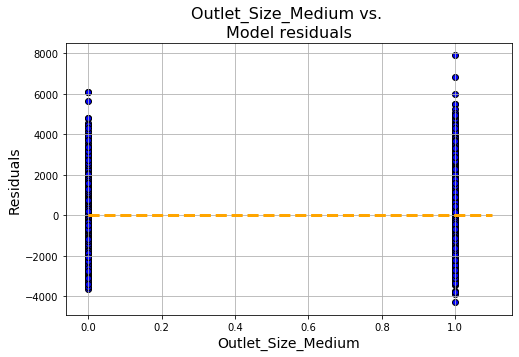

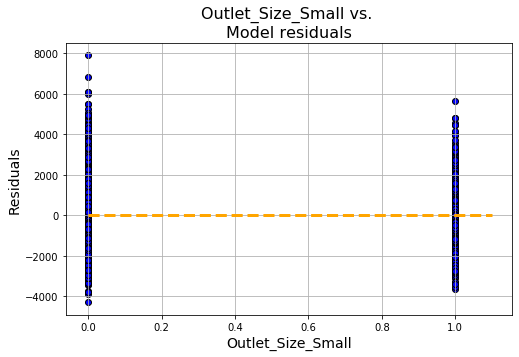

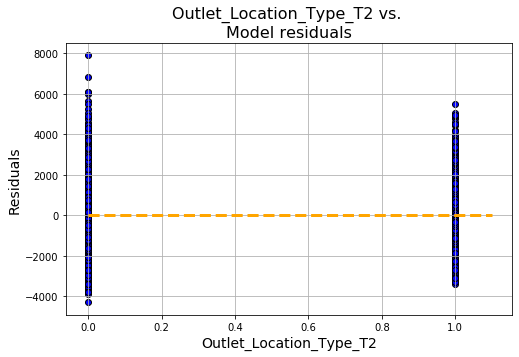

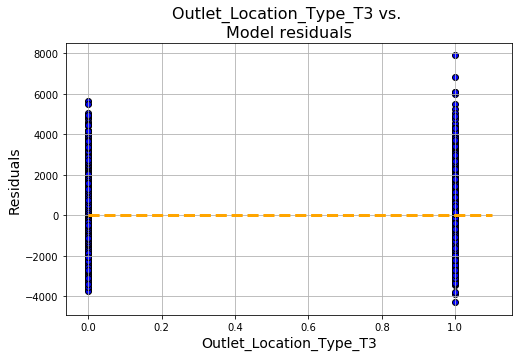

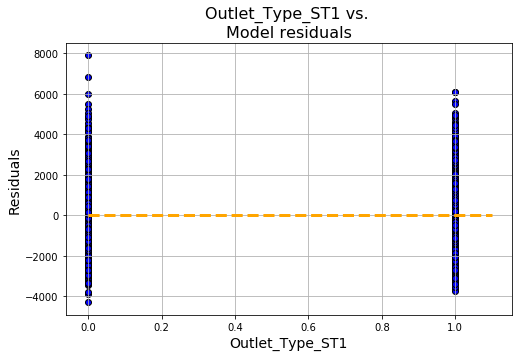

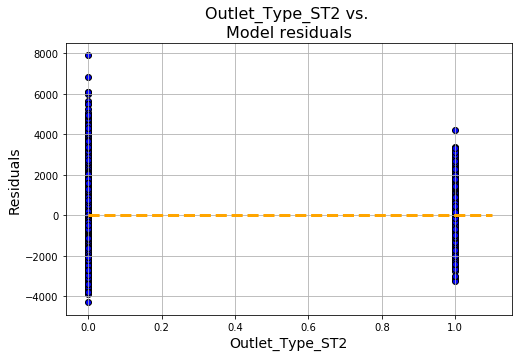

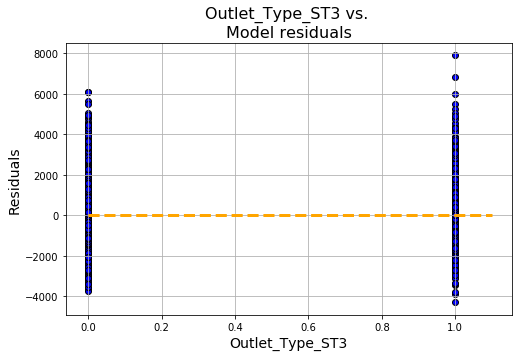

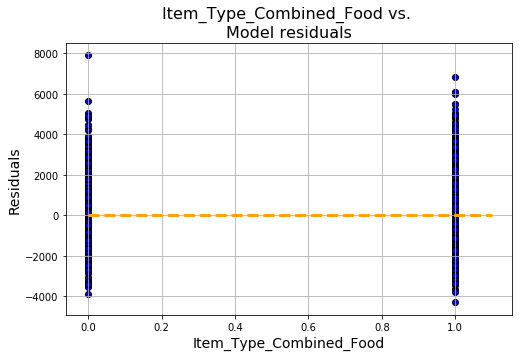

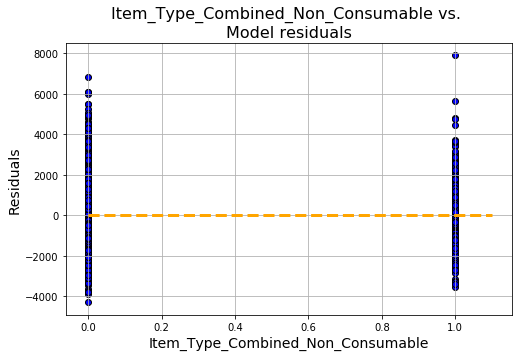

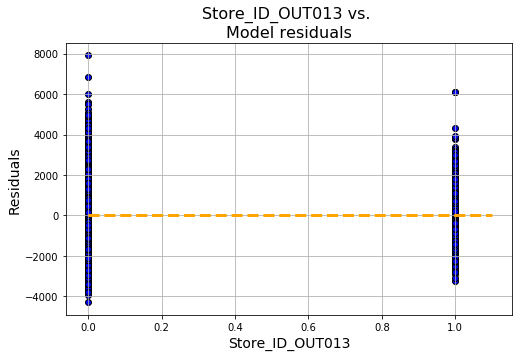

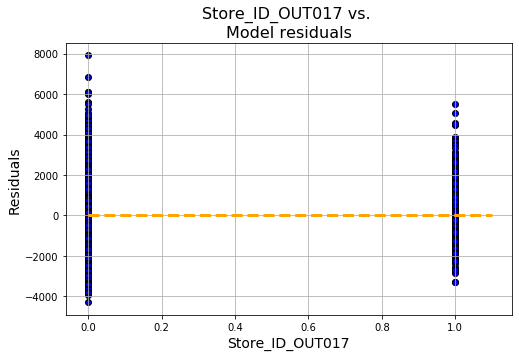

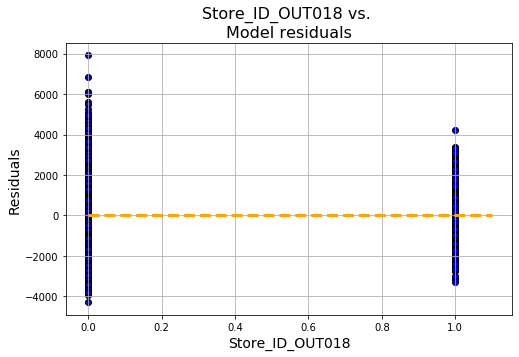

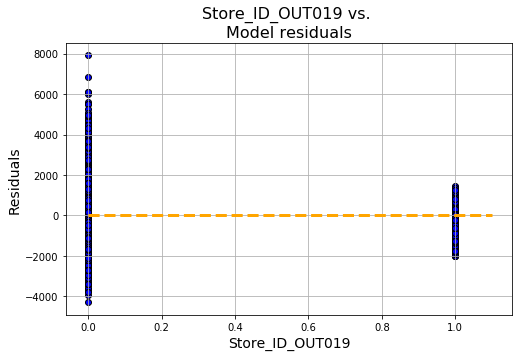

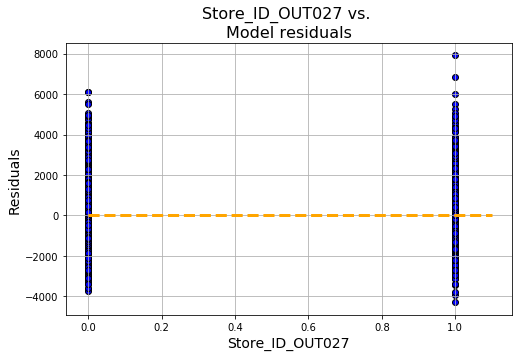

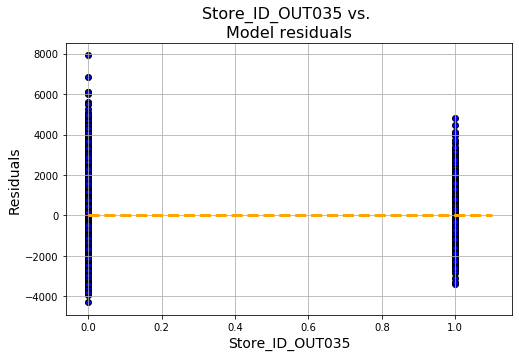

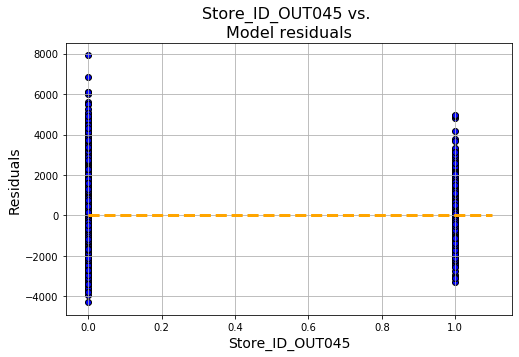

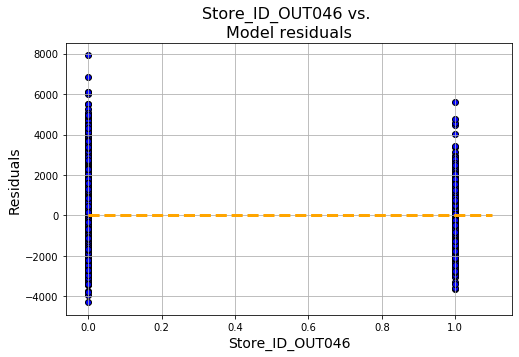

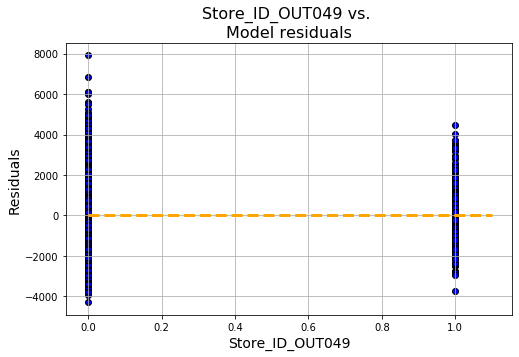

In [73]:
for c in train[predictors]:
    plt.figure(figsize=(8,5))
    plt.title("{} vs. \nModel residuals".format(c),fontsize=16)
    plt.scatter(x=train[c],y=fitted.resid,color='blue',edgecolor='k')
    plt.grid(True)
    xmin=min(train[c])
    xmax = max(train[c])
    plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='orange',linestyle='--',lw=3)
    plt.xlabel(c,fontsize=14)
    plt.ylabel('Residuals',fontsize=14)
    plt.show()


## Residual plots show  bit of clustering but overall the assumptions of linearity and independence seem to hold because the distribution seem random around the 0 axis.

# Residual Vs Fitted

# A test of homoskedasticity

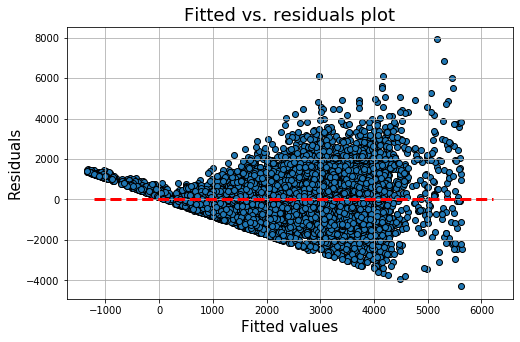

In [74]:
plt.figure(figsize=(8,5))
p=plt.scatter(x=fitted.fittedvalues,y=fitted.resid,edgecolor='k')
xmin=min(fitted.fittedvalues)
xmax = max(fitted.fittedvalues)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)
plt.show()

## we clearly observe that the variance of the residuals increases with response variable magnitude. 
## Therefore, the problem does not respect homoscedasticity and some kind of variable transformation may be needed to improve model quality.

# we will build one of the models with transforming the response and one without it

## ===================================================================

# NORMALITY

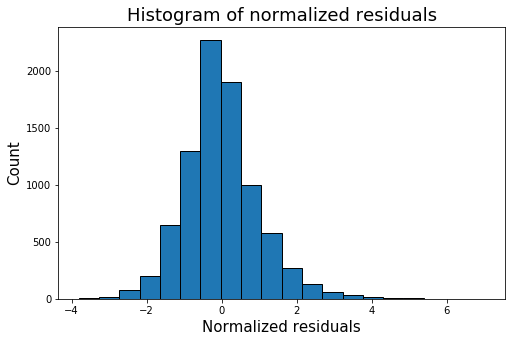

In [75]:
#distribution of the normalized residuals on the partially fitted data

plt.figure(figsize=(8,5))
plt.hist(fitted.resid_pearson,bins=20,edgecolor='k')
plt.ylabel('Count',fontsize=15)
plt.xlabel('Normalized residuals',fontsize=15)
plt.title("Histogram of normalized residuals",fontsize=18)
plt.show()

<Figure size 576x360 with 0 Axes>

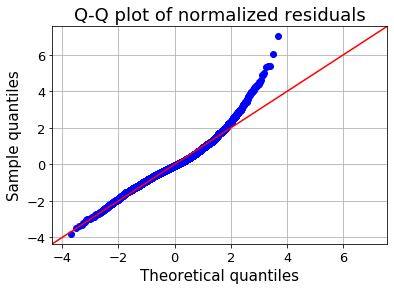

In [76]:
from statsmodels.graphics.gofplots import qqplot
plt.figure(figsize=(8,5))
fig=qqplot(fitted.resid_pearson,line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles",fontsize=15)
plt.ylabel("Sample quantiles",fontsize=15)
plt.title("Q-Q plot of normalized residuals",fontsize=18)
plt.grid(True)
plt.show()

# Shows the normality asssumption of the residual is partially justified here

Many users of statistics believe that ordinary least squares (OLS) regression models are valid only when both the outcome variable (Y) 
and the explanatory variables (the X-variables) are normally distributed. 
Because of that belief, some folks transform the variables in order to make their distributions closer to normal prior to estimating a linear regression model. However, this practice is misguided.

OLS regression models make no distributional assumptions about either the explanatory variables or the outcome variable.

The key assumptions for OLS regression are that the errors are independently and identically distributed as normal with a mean of 0 and a variance equal to some unknown value (σ2). 

Furthermore, normality of the errors is the least important of those assumptions. Before transforming any variables, therefore, data analysts ought to estimate their linear regression models using the original variables, 

and then examine the residuals (i.e., the fitting errors) to determine how well the key assumptions have been met. The need for transformations should be considered only after analysis of the residuals from a model using the original untransformed variables.
One clear advantage of using the original variables is that the results are usually much easier to interpret.
https://www.researchgate.net/publication/320617363_Silly_or_pointless_things_people_do_when_analyzing_data_3_Transforming_variables_to_make_them_more_normal_prior_to_linear_regression_analysis

# ----------------------------------------------------------------------------------------------------------
# Normality (Shapiro-Wilk) test of the residuals

In [77]:
# from scipy.stats import shapiro
# _,p=shapiro(fitted.resid)
# if p<0.01:
#     print("The residuals seem to come from Gaussian process")
# else:
#     print("The normality assumption may not hold")

In [78]:
# Since Shapiro Wilk test is advisable

# to be updated

# Cook's distance (checking for outliers in residuals)

In [79]:
# from statsmodels.stats.outliers_influence import OLSInfluence as influence
# inf=influence(fitted)
# (c, p) = inf.cooks_distance
# plt.figure(figsize=(8,5))
# plt.title("Cook's distance plot for the residuals",fontsize=16)
# plt.stem(np.arange(len(c)), c, markerfmt=",")
# plt.grid(True)
# plt.show()

# Performing a cross validation on train set and then finally predicting on test set

In [80]:
target='Item_Outlet_Sales'

# MODEL 1

In [103]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
def fit_model(algo, train,test, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    algo.fit(train[predictors], train[target])
        
#Predict training set:
    train_predictions = algo.predict(train[predictors])


#Perform cross-validation:
    cv_score = cross_val_score(algo, train[predictors],train[target] , cv=5, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
#Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(train[target].values, train_predictions)))
    print("R2 : %.4g" % np.sqrt(metrics.r2_score(train[target].values, train_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
#Predict on testing data:
    test[target] = np.absolute(algo.predict(test[predictors]))
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: test[x] for x in IDcol})
    submission.to_csv(filename, index=False)

# WHY ARE WE PERFORMING CROSS_ VALIDATION ???

In [82]:
#To avoid leakage of information from the train to test, we hold out some data from the train set itself for validation and
# then we do the evaluation of how our algorithm performs on the unseen data(test set)

#However, by partitioning the available data into three sets, we drastically reduce the number of
# samples which can be used for learning the model, 
# and the results can depend on a particular random choice for the pair of (train, validation) sets.


# A solution to this problem is a procedure called cross-validation (CV for short). 
# A test set should still be held out for final evaluation, but the validation set is no longer 
# needed when doing CV. In the basic approach, called k-fold CV, the training set is split into k smaller sets
# (other approaches are described below, but generally follow the same principles). 
# The following procedure is followed for each of the k “folds”:

# A model is trained using  of the folds as training data;

# the resulting model is validated on the remaining part of the data 
# (i.e., it is used as a test set to compute a performance measure such as accuracy).

# The performance measure reported by k-fold cross-validation is then the average of the 
# values computed in the loop. This approach can be computationally expensive, but does not waste
# too much data (as is the case when fixing an arbitrary validation set), which is a major
# advantage in problems such as inverse inference where the number of samples is very small.





![grid_search_cross_validation](https://user-images.githubusercontent.com/45167372/73746636-a69bcf80-477b-11ea-9959-966bf0d246ef.png)

# WHY OR HOW SPECIFICALLY DID WE USE THE SCORING METRIC

#let's check what exacly do we have as the options ?
#list(sklearn.metrics.SCORERS.keys())
![Scoring_metrics](https://user-images.githubusercontent.com/45167372/73746712-d2b75080-477b-11ea-900f-1ab73cb5b603.png)

In [104]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
fit_model(LR, train, test, final, target, IDcol, 'LR.csv')


Model Report
RMSE : 1129
R2 : 0.7497
CV Score : Mean - 1131 | Std - 14.22 | Min - 1113 | Max - 1153


C:\Users\shashank.upadhyay\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# MODEL 2


In [105]:

def fit_model_1(algo, train,test, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    algo.fit(train[predictors], np.log(train[target]))
        
#Predict training set:
    train_predictions = algo.predict(train[predictors])


#Perform cross-validation:
    cv_score = cross_val_score(algo, train[predictors],np.log(train[target]) , cv=5, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
#Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((train[target]).values, np.exp(train_predictions))))
    print("R2 : %.4g" % np.sqrt(metrics.r2_score((train[target]).values, np.exp(train_predictions))))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
#Predict on testing data:
    test[target] = np.exp(algo.predict(test[predictors]))
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: test[x] for x in IDcol})
    submission.to_csv(filename, index=False)

In [106]:
fit_model_1(LR, train, test, final, target, IDcol, 'LR_normalized_target.csv')


Model Report
RMSE : 1142
R2 : 0.7428
CV Score : Mean - 0.5389 | Std - 0.006143 | Min - 0.5306 | Max - 0.548


C:\Users\shashank.upadhyay\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
